In [3]:
!pip install kagglehub
!pip install kaggle
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [4]:
!pip install --upgrade openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [8]:
%pip install --upgrade openpyxl
import openpyxl
print(openpyxl.__version__)



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/250.9 kB ? eta -:--:--
     -------------------------------------- 250.9/250.9 kB 7.8 MB/s eta 0:00:00
3.1.5


In [15]:
%pip install snorkel

                                              0.0/103.3 kB ? eta -:--:--
     -------------------------------------- 103.3/103.3 kB 5.8 MB/s eta 0:00:00
                                              0.0/45.8 kB ? eta -:--:--
     ---------------------------------------- 45.8/45.8 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importação das bibliotecas

In [10]:
import pandas as pd
import numpy as np
from snorkel.labeling import LabelingFunction, LFApplier  # Corrigido import
from snorkel.labeling.model import LabelModel, MajorityLabelVoter
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.feature_extraction.text import TfidfVectorizer
from snorkel.labeling import LFAnalysis


Carregamento do dataset

In [42]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Carregar o dataset (supondo que já tenha sido carregado corretamente)
file_path_2 = "Airline_Reviews_Combined.xlsx"  # Ajuste conforme o nome correto do arquivo

# Carregar o dataset usando o KaggleHub (alternativa à leitura direta com pandas)
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rosemeenshaikh/a-z-airline-reviews",
  file_path_2,
)

# Exibir as primeiras 5 linhas para inspecionar os dados
print("Primeiros 5 registros:", df.head())



C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22988\813170855.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Primeiros 5 registros:          Airline                                  Title          Author  \
0    AB Aviation                "pretty decent airline"      Tom Hansen   
1    AB Aviation                   "Not a good airline"   Gyan Fernando   
2    AB Aviation         "flight was fortunately short"   Gyan Fernando   
3  Adria Airways    "I will never fly again with Adria"  D Praetextatus   
4  Adria Airways  "it ruined our last days of holidays"        D Meijer   

          Country                 Date  Verified  \
0     Netherlands   11th November 2019      True   
1  United Kingdom       25th June 2019      True   
2  United Kingdom       25th June 2019      True   
3          Serbia  28th September 2019     False   
4     Netherlands  24th September 2019      True   

                                              Review Type Of Traveller  \
0  ✅Trip Verified|  Moroni to Moheli. Turned out ...      Solo Leisure   
1  ✅Trip Verified| Moroni to Anjouan. It is a ver...      Solo Le

Distribuição das avaliações por tipo de assento

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22988\3902676915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seat Type', data=df, palette='Set2')


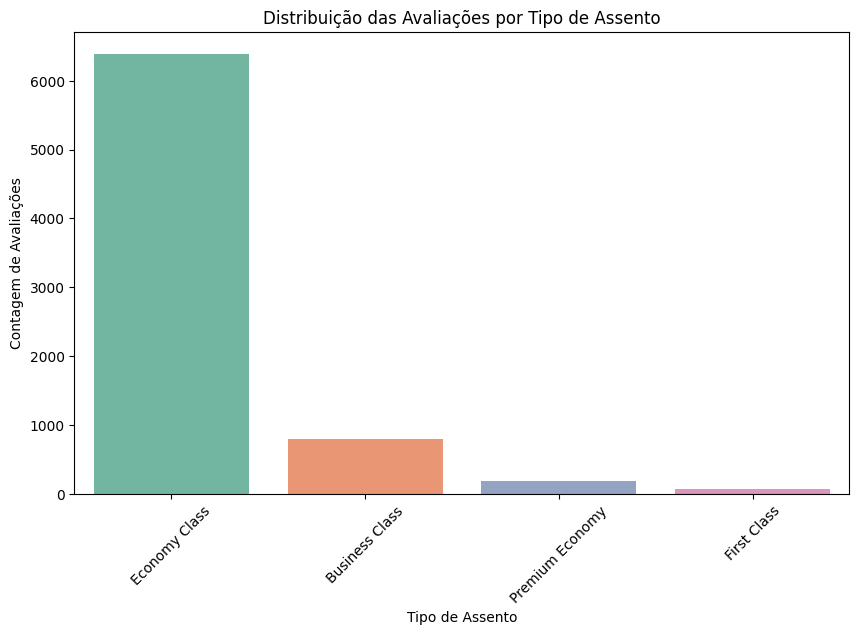

In [29]:
# Distribuição das avaliações por tipo de assento
plt.figure(figsize=(10, 6))
sns.countplot(x='Seat Type', data=df, palette='Set2')
plt.title('Distribuição das Avaliações por Tipo de Assento')
plt.xlabel('Tipo de Assento')
plt.ylabel('Contagem de Avaliações')
plt.xticks(rotation=45)
plt.show()


Relação entre o conforto do assento e o tipo de assento

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22988\15467082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seat Type', y='Seat Comfort', data=df, palette='Set2')


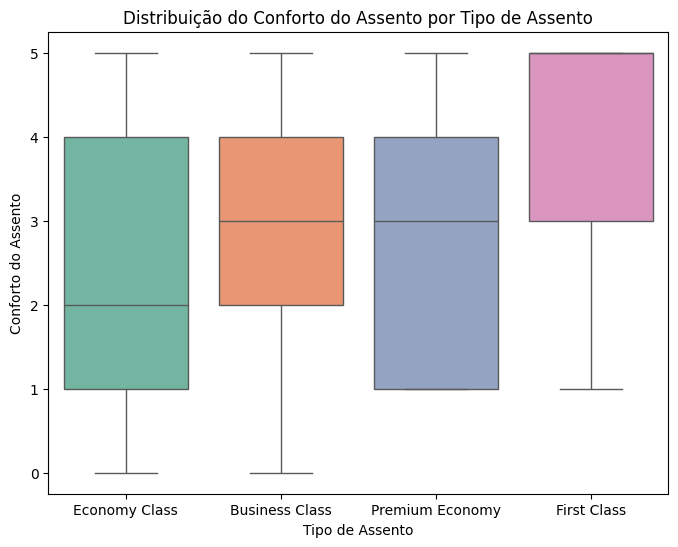

In [30]:
# Boxplot para visualizar a relação entre o conforto do assento e o tipo de assento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Seat Type', y='Seat Comfort', data=df, palette='Set2')
plt.title('Distribuição do Conforto do Assento por Tipo de Assento')
plt.xlabel('Tipo de Assento')
plt.ylabel('Conforto do Assento')
plt.show()


Distribuição do serviço de tripulação

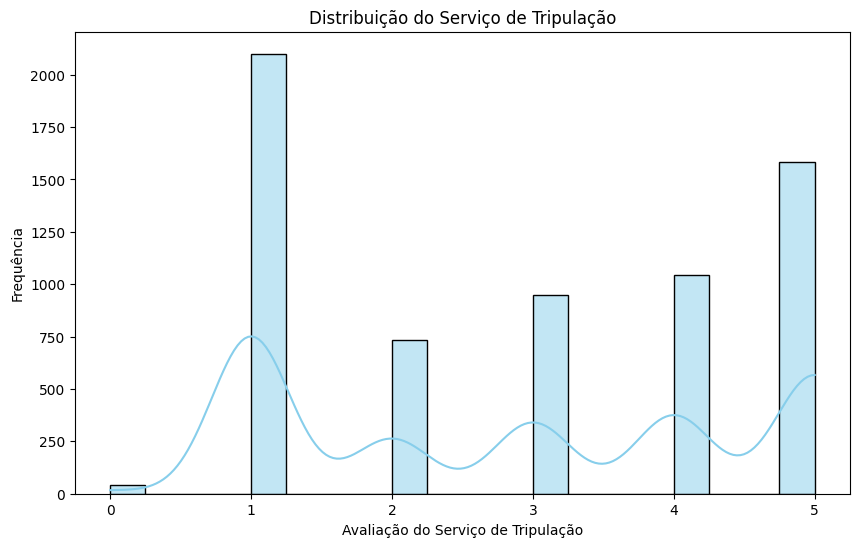

In [31]:
# Distribuição do serviço de tripulação
plt.figure(figsize=(10, 6))
sns.histplot(df['Cabin Staff Service'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição do Serviço de Tripulação')
plt.xlabel('Avaliação do Serviço de Tripulação')
plt.ylabel('Frequência')
plt.show()


Tipo de viajante e avaliação geral

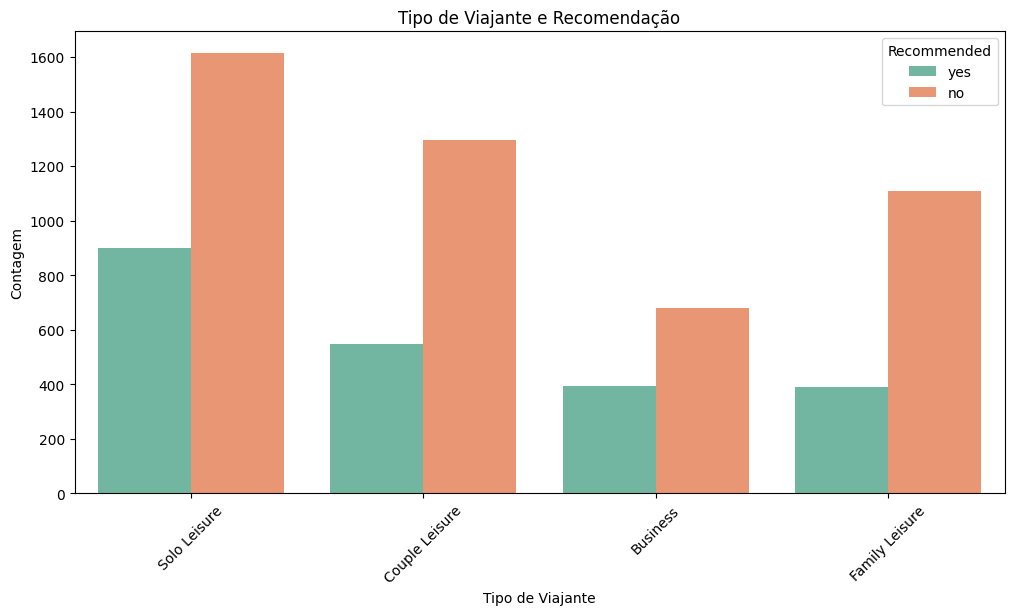

In [32]:
# Comparação do tipo de viajante e avaliação geral
plt.figure(figsize=(12, 6))
sns.countplot(x='Type Of Traveller', hue='Recommended', data=df, palette='Set2')
plt.title('Tipo de Viajante e Recomendação')
plt.xlabel('Tipo de Viajante')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


Avaliação de alimentação e bebidas

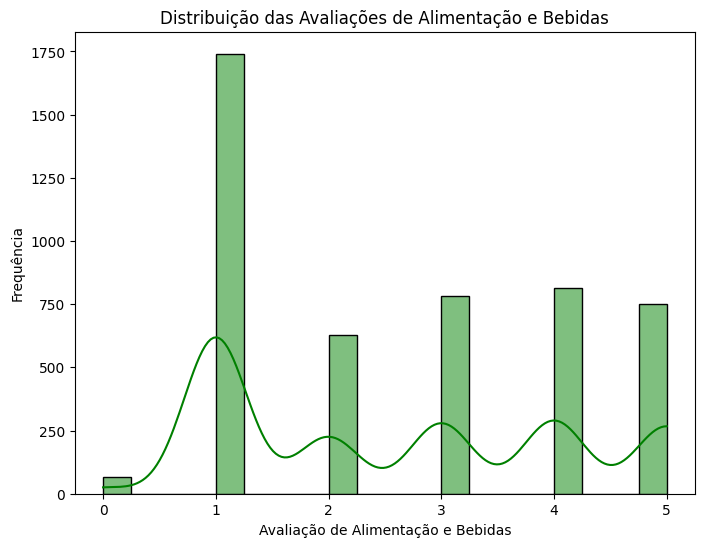

In [33]:
# Distribuição das avaliações de alimentação e bebidas
plt.figure(figsize=(8, 6))
sns.histplot(df['Food & Beverages'], kde=True, color='green', bins=20)
plt.title('Distribuição das Avaliações de Alimentação e Bebidas')
plt.xlabel('Avaliação de Alimentação e Bebidas')
plt.ylabel('Frequência')
plt.show()


Conforto do assento e recomendação

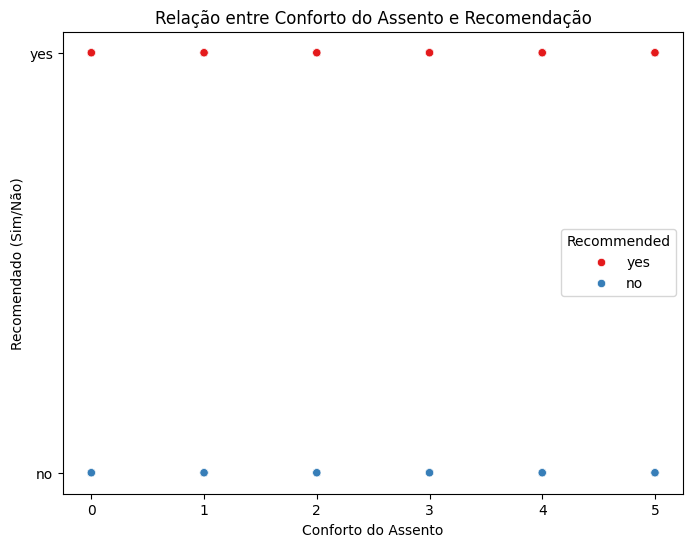

In [34]:
# Scatterplot para analisar a relação entre conforto do assento e recomendação
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Seat Comfort', y='Recommended', data=df, palette='Set1', hue='Recommended')
plt.title('Relação entre Conforto do Assento e Recomendação')
plt.xlabel('Conforto do Assento')
plt.ylabel('Recomendado (Sim/Não)')
plt.show()


Tipo de viajante e recomendação

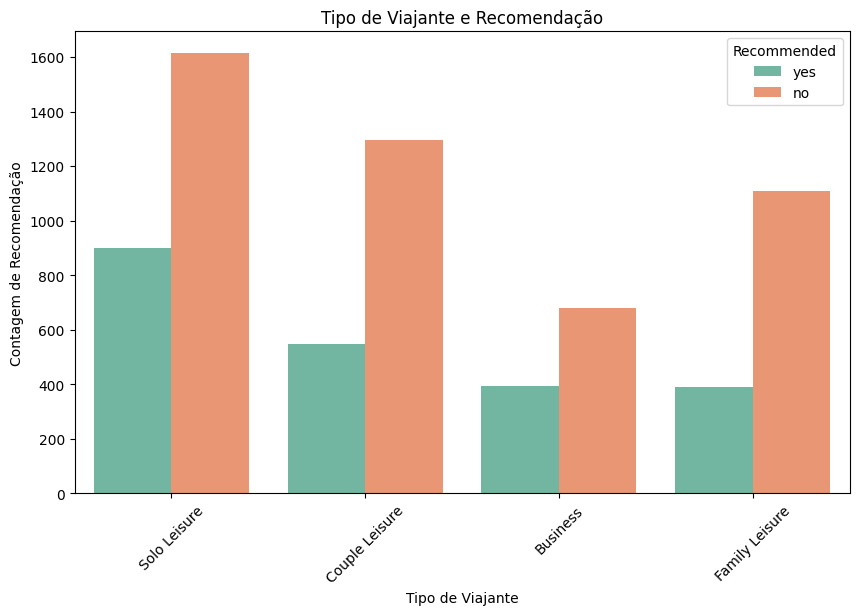

In [36]:
# Analisando recomendação por tipo de viajante
plt.figure(figsize=(10, 6))
sns.countplot(x='Type Of Traveller', hue='Recommended', data=df, palette='Set2')
plt.title('Tipo de Viajante e Recomendação')
plt.xlabel('Tipo de Viajante')
plt.ylabel('Contagem de Recomendação')
plt.xticks(rotation=45)
plt.show()


Comprimento das avaliações

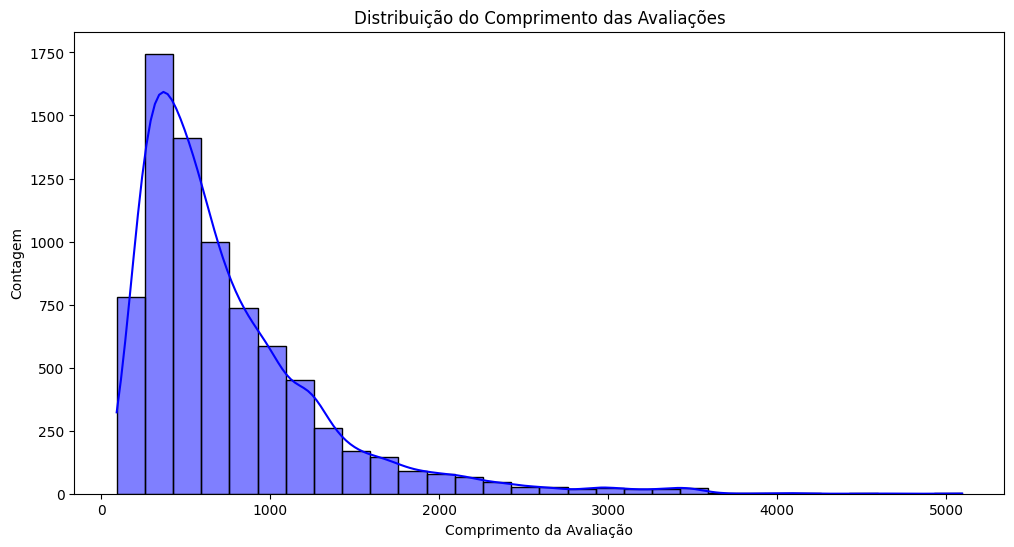

In [37]:
# Criando uma nova coluna para o comprimento de cada avaliação
df['Review Length'] = df['Review'].apply(len)

# Plotando a distribuição do comprimento das avaliações
plt.figure(figsize=(12, 6))
sns.histplot(df['Review Length'], bins=30, kde=True, color='blue')
plt.title('Distribuição do Comprimento das Avaliações')
plt.xlabel('Comprimento da Avaliação')
plt.ylabel('Contagem')
plt.show()


In [39]:
%pip install textblob

                                              0.0/624.3 kB ? eta -:--:--
     -----------------------                378.9/624.3 kB 7.8 MB/s eta 0:00:01
     -------------------------------------- 624.3/624.3 kB 7.9 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     ------------------------------------     1.4/1.5 MB 42.9 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Distribuição das avaliações

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22988\812764162.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set1')


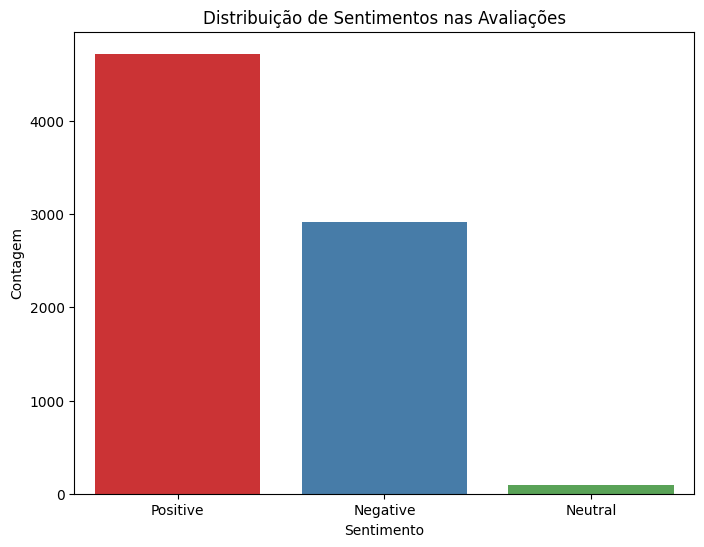

In [40]:
from textblob import TextBlob

# Função para calcular o sentimento
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicando a função de sentimento às avaliações
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Visualizando a distribuição dos sentimentos
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set1')
plt.title('Distribuição de Sentimentos nas Avaliações')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()


Definição das funções de etiquetagem (LFs)

In [15]:
# Definir os rótulos para positivo e negativo
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1  # Abstém-se se não puder classificar com confiança

# Funções de Etiquetagem (LFs)

# LF1: Verificar palavras-chave positivas
def lf_positive_keywords(review):
    positive_keywords = ['good', 'excellent', 'great', 'love', 'best', 'amazing', 'outstanding']
    return POSITIVE if any(word in review.lower() for word in positive_keywords) else ABSTAIN

# LF2: Verificar palavras-chave negativas
def lf_negative_keywords(review):
    negative_keywords = ['bad', 'poor', 'hate', 'worst', 'awful', 'terrible', 'disappointed']
    return NEGATIVE if any(word in review.lower() for word in negative_keywords) else ABSTAIN

# LF3: Usar modelo pré-treinado para análise de sentimentos
sentiment_model = pipeline("sentiment-analysis")  # Usando modelo pré-treinado da Hugging Face

def lf_sentiment_model(review):
    try:
        # Truncar a entrada se o comprimento exceder 512 tokens
        result = sentiment_model(review[:512])  # Truncando para o limite de 512 tokens
        label = result[0]['label'].lower()
        if label == 'positive':
            return POSITIVE
        elif label == 'negative':
            return NEGATIVE
        else:
            return ABSTAIN
    except:
        return ABSTAIN  # Em caso de erro, abstém-se da classificação

# Criando funções de etiquetagem como instâncias de LabelingFunction
lf_positive_keywords = LabelingFunction(name="positive_keywords", f=lf_positive_keywords)
lf_negative_keywords = LabelingFunction(name="negative_keywords", f=lf_negative_keywords)
lf_sentiment_model = LabelingFunction(name="sentiment_model", f=lf_sentiment_model)

# Lista de LFs
lfs = [lf_positive_keywords, lf_negative_keywords, lf_sentiment_model]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\Alan de Castro\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Aplicação das LFs no dataset e Análise de Desempenho

In [16]:
# Aplicar as funções de etiquetagem (LFs) ao dataset
lfa = LFApplier(lfs)  # Usando LFApplier em vez de PandasLFApplier
labels = lfa.apply(df['Review'])

# Análise de Desempenho das LFs
analysis = LFAnalysis(L=labels, lfs=lfs).lf_summary()
print("Análise de desempenho das LFs:", analysis)


7730it [18:17,  7.04it/s]


Análise de desempenho das LFs:                    j Polarity  Coverage  Overlaps  Conflicts
positive_keywords  0      [1]  0.330789  0.330789   0.170116
negative_keywords  1      [0]  0.336740  0.336740   0.094825
sentiment_model    2   [0, 1]  1.000000  0.580595   0.178008


Construção do modelo de rótulos para agregação de ruído

In [18]:
# Construir o modelo de rótulos para agregação de ruído
label_model = LabelModel(cardinality=2)  # Removido o argumento 'ignore_index'

# Ajuste do modelo de rótulos com os rótulos probabilísticos
label_model.fit(labels)

# Obter os rótulos probabilísticos gerados pelo modelo de rótulos
probabilistic_labels = label_model.predict_proba(labels)

# Adicionar os rótulos probabilísticos ao dataframe
df['probabilistic_label'] = probabilistic_labels[:, 1]  # Probabilidade de ser positivo

# Exibir as primeiras 5 linhas com os rótulos probabilísticos
print("Primeiros 5 registros com rótulos probabilísticos:", df[['Review', 'probabilistic_label']].head())


INFO:root:Computing O...
INFO:root:Estimating \mu...
  1%|          | 1/100 [00:00<00:27,  3.54epoch/s]INFO:root:[10 epochs]: TRAIN:[loss=0.224]
INFO:root:[20 epochs]: TRAIN:[loss=0.066]
INFO:root:[30 epochs]: TRAIN:[loss=0.031]
INFO:root:[40 epochs]: TRAIN:[loss=0.025]
 45%|████▌     | 45/100 [00:00<00:00, 150.05epoch/s]INFO:root:[50 epochs]: TRAIN:[loss=0.010]
INFO:root:[60 epochs]: TRAIN:[loss=0.007]
INFO:root:[70 epochs]: TRAIN:[loss=0.004]
INFO:root:[80 epochs]: TRAIN:[loss=0.003]
100%|██████████| 100/100 [00:00<00:00, 185.22epoch/s]
INFO:root:Finished Training


Primeiros 5 registros com rótulos probabilísticos:                                               Review  probabilistic_label
0  ✅Trip Verified|  Moroni to Moheli. Turned out ...             0.999824
1  ✅Trip Verified| Moroni to Anjouan. It is a ver...             0.757270
2  ✅Trip Verified|  Anjouan to Dzaoudzi. A very s...             0.292297
3  Not Verified|  Please do a favor yourself and ...             0.292297
4  ✅Trip Verified| Do not book a flight with this...             0.292297


Pré-processamento de Texto com TF-IDF

In [19]:
# Pré-processamento de Texto com TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limitar para 5000 features
X_tfidf = vectorizer.fit_transform(df['Review'])


Divisão dos dados em treino e teste

In [20]:
# Definir y (rótulos) binários a partir das probabilidades
y = (df['probabilistic_label'] > 0.5).astype(int)  # Converter probabilidades para rótulos binários

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Treinamento do modelo RandomForest e avaliação

In [21]:
# Exemplo de modelo de Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

# Calcular e exibir o Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1020
           1       0.89      0.85      0.87       526

    accuracy                           0.91      1546
   macro avg       0.91      0.90      0.90      1546
weighted avg       0.91      0.91      0.91      1546

MCC: 0.8066826635007076


Comparação com MajorityLabelVoter

In [26]:
# Comparação com MajorityLabelVoter
from snorkel.labeling.model.baselines import MajorityLabelVoter

# Usar MajorityLabelVoter para obter rótulos com base na votação majoritária
majority_model = MajorityLabelVoter(cardinality=2)  # Defina o número de classes

# Obter as predições para o conjunto de rótulos
majority_pred = majority_model.predict(L=labels)  # Aplicando no conjunto de rótulos

# Assegurando que as predições correspondem ao tamanho de y_test
majority_pred_test = majority_pred[:len(y_test)]  # Ajustando o tamanho

# Calcular o Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, majority_pred_test)
print("MCC do Majority Label Voter:", mcc)


MCC do Majority Label Voter: -0.007635767370976364
